
# Project: Investigate a Dataset (Patient Appoitment)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

"No-show appointments" data set is collection of data gatherd to determine the tendency of patients to show up for their appointment. This data set contain many collumns include PatientId ,AppointmentID,	Gender,	ScheduledDay,AppointmentDay,Age,	Neighbourhood ,Scholarship ,Hipertension, Diabetes ,Alcoholism ,Handcap , SMS_received and No-show. In this studey we will address three variable that can affect patient attendance. First, Neighbourhood which is the location of hospital and determine if location affect patient attendance. Second, Scholarship and whether having scholorship cam impact patirnt attendance to appointment.Finally, days betweeen the day paitent took appointment and appointment day.  


In [132]:
#  Import statements

import pandas as pd
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [102]:
# Load  data 
# Inspect any duplicate or missing data
df=pd.read_csv(r'C:\Users\dell\Desktop\udacity\Project 2\DataSet\Appointments_Showup.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [103]:
# Check data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [104]:
# Since AppointmentDay store only date so will remove time
df['AppointmentDay']=df['AppointmentDay'].str.replace('T00:00:00Z', '')    

In [105]:
# Change data type to datetime with format yyyy-mm-dd
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'], format='%Y-%m-%d')

In [106]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Since Appointment Date column store only date so will remove time by using replace function. Then we convert data type from string to datetime using to_datetime function.

In [107]:
# Remove time for column ScheduledDay because we are not comparing time by using append function to remove last 10 digits
ScheduledDay_N=[]
for x in df['ScheduledDay']:
    ScheduledDay_N.append(x [:-10]) 

df['ScheduledDay']=ScheduledDay_N

In [108]:
# Change data type to datetime with format yyyy-mm-dd
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'], format='%Y-%m-%d')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [109]:
# Change column name of No-show to Show Up to make it clear and avoid misunderstand
df.rename(columns={'No-show': 'Show_up'},inplace=True)

In [110]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show_up
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [111]:
# Replace No value in column Show_up to 1 because they represent Patient who attended their appointment and to make data more clear
df['Show_up']=df['Show_up'].replace(['No'], '1')

In [112]:
# Replace Yes value in column Show_up to 0 because they represent Patient who missed their appointment and to make data more clear
df['Show_up']=df['Show_up'].replace(['Yes'], '0')

In [113]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show_up
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1


In [114]:
# Change data type to int since we are storing binary data 
df['Show_up']= df['Show_up'].astype(int)

In [115]:
# print data type to make sure changes were made in columns 
# AppointmentDay and ScheduledDay --> datetime
# Show_up --> int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  Show_up         110527 non-null  int32         
dtypes: datetime64[ns](2), float64(1), in

<a id='eda'></a>
## Exploratory Data Analysis



### Neighbourhood and Attending Appointment
Using data we gather and cleansed, we will explore data to get an insight about it and to find any relation between location of hospital as a independent variable and patient attendance as a dependent variable.

First we will get mean of attendance for all Neighbourhood.Since we have 81 unique Neighbourhoods we will focus on top 10 Neighbourhoods which have highest attendance rate than the average of all Neighbourhoods attendance.

In [116]:
# Get list of Neighbourhood mean attendance in descending order
list_Nig=df.groupby(['Neighbourhood'],as_index=False)['Show_up'].mean().sort_values(by=('Show_up'),ascending=False)
list_Nig.head()
list_Nig


,Neighbourhood,Show_up
51,PARQUE INDUSTRIAL,1.000000
31,ILHA DO BOI,0.914286
0,AEROPORTO,0.875000
48,MÁRIO CYPRESTE,0.854447
73,SOLON BORGES,0.852878
...,...,...
36,ITARARÉ,0.737336
62,SANTA CLARA,0.735178
61,SANTA CECÍLIA,0.725446
70,SANTOS DUMONT,0.710815


In [117]:
# Get top 10 Neighbourhoods which have mean attendance higher than average
top=list_Nig.query('Show_up > Show_up.mean()')
top_lis=top.sort_values(by=('Show_up'),ascending=False).head(10)
top_lis


,Neighbourhood,Show_up
51,PARQUE INDUSTRIAL,1.000000
31,ILHA DO BOI,0.914286
0,AEROPORTO,0.875000
48,MÁRIO CYPRESTE,0.854447
73,SOLON BORGES,0.852878
16,DE LOURDES,0.845902
17,DO CABRAL,0.842857
66,SANTA MARTHA,0.841584
39,JARDIM DA PENHA,0.837245
19,DO QUADRO,0.835100


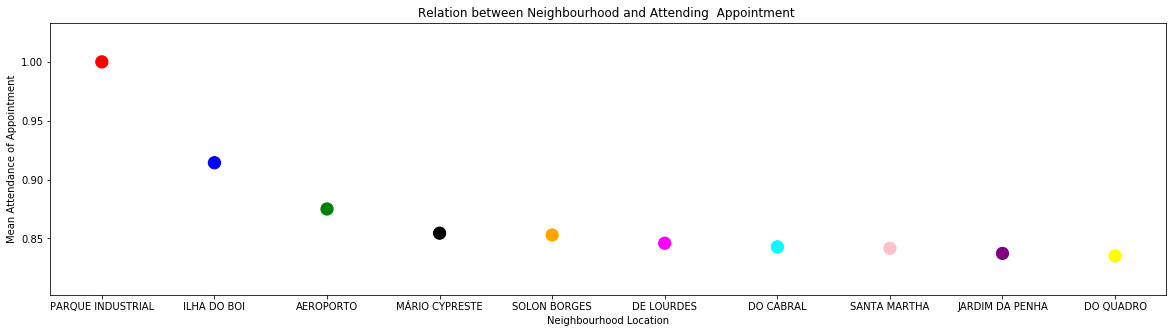

In [131]:
# Ploting data for top 10 Neighbourhood
plt.subplots(figsize=(20, 5))
plt.scatter(top_lis['Neighbourhood'],top_lis['Show_up'],s=150,color=['red', 'blue', 'green', 'black', 'orange','magenta','cyan','pink','purple','yellow'])
plt.title('Relation between Neighbourhood and Attending  Appointment ')
plt.xlabel('Neighbourhood Location')
plt.ylabel('Mean Attendance of Appointment');

Scatter plot up shows that there patient attendance of their appointment can be determined by hospital (neighborhood). Therefore, patient distance to hospital should be consider as a factor that reduce missed appointment rate.

### Scholarship and Attending Appointment

In [120]:
# Get mean of Scholarship mean attendance 

df.groupby(['Scholarship'] , as_index=True, axis=0).mean()['Show_up'].reset_index(name='Show_up')relation between period and appointment

,Scholarship,Show_up
0,0,0.801928
1,1,0.762637


In [121]:
# Store Patient who have Scholarship and attended 
Scholarship_Y=df.groupby(['Scholarship'] , as_index=True, axis=0).mean()[['Show_up']].tail(1)
Scholarship_Y
# Store Patient who do not have Scholarship and attended 
Scholarship_N=df.groupby(['Scholarship'] , as_index=True, axis=0).mean()[['Show_up']].head(1)
Scholarship_N

,Show_up
Scholarship,
0,0.801928


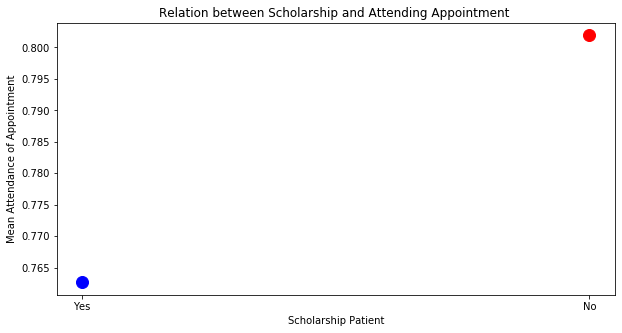

In [129]:
# Ploting data for Scholarship and attendance
x1=['Yes']
y1=Scholarship_Y['Show_up']
x2=['No']
y2=Scholarship_N['Show_up']
plt.subplots(figsize=(10, 5))
plt.plot(x1, y1, color='blue', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=12)
plt.plot(x2, y2, color='red', linestyle='dashed', marker='o', markerfacecolor='red', markersize=12)
plt.title('Relation between Scholarship and Attending Appointment ')
plt.xlabel('Scholarship Patient')
plt.ylabel('Mean Attendance of Appointment');

This chart reveals that patient who have scholarship tend to miss their appointment. On other hand, patient who do not have scholarship incline to attend their appointment. Consquently, decision about giving patient scholarship should be revise to determine criteria should be consider or maybe coniser giving discount.

### Period and Appointment

In [95]:
# Calculate difference between Appointment Day and Scheduled Day
df['diff_Appoint_Schedul'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [96]:
# Create categorical column (Appoint_Schedul_Period) from difference between Appointment day Scheduled day
df.describe().diff_Appoint_Schedul

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: diff_Appoint_Schedul, dtype: float64

In [97]:
# bin value for column period
bin_edges = [-6,0,4,15,179 ]
# bin label for column period
bin_names = ['Same_Day','One_Week', 'Two_Week','Long'  ]

In [98]:
# Add column Appoint_Schedul_Period to data frame 
df['Appoint_Schedul_Period'] = pd.cut(df['diff_Appoint_Schedul'], bin_edges, labels=bin_names)

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show_up,diff_Appoint_Schedul,Appoint_Schedul_Period
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,Same_Day
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,Same_Day
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0,Same_Day
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0,Same_Day
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0,Same_Day


In [99]:
# Group Appoint_Schedul_Period column with Show_up
Diff_Period= df.groupby(['Appoint_Schedul_Period'] , as_index=True).mean()['Show_up'].reset_index(name='Show_up')
Diff_Period

,Appoint_Schedul_Period,Show_up
0,Same_Day,0.953432
1,One_Week,0.770098
2,Two_Week,0.714619
3,Long,0.672941


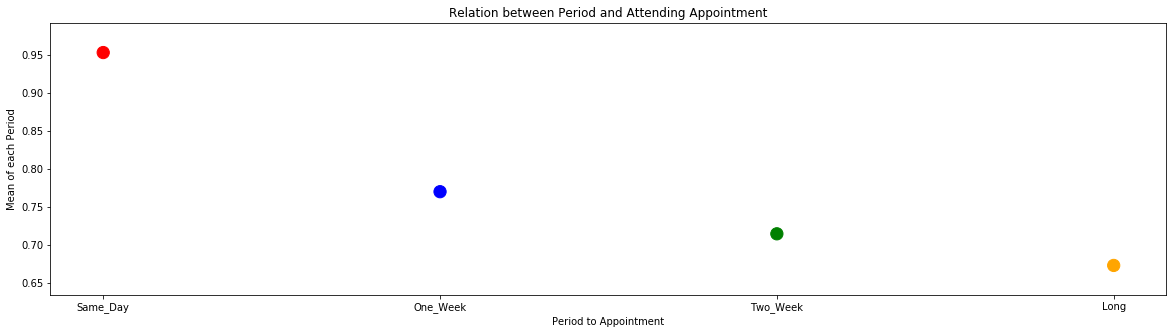

In [123]:
# Graph for Appoint_Schedul_Period and Show_up
plt.subplots(figsize=(20, 5))
plt.scatter(Diff_Period['Appoint_Schedul_Period'],Diff_Period['Show_up'],s=150,color=['red', 'blue', 'green', 'orange'])
plt.title('Relation between Period and Attending Appointment')
plt.xlabel('Period to Appointment')
plt.ylabel('Mean of each Period');

Graphically illustrated that patient who book their appointment day soon will have higher tendency to attend it. However Patient who book their appointment to be after more than 14 days will most likely miss it either because they forgot or have different plan. Accordingly, It is better to let patients book their appointment within two weeks maximum in order to avoid missing it.

<a id='conclusions'></a>
## Conclusions
Data was gathered in this research to find any connection between attending an appointment for the patient and three independent variables. These variables are neighborhood, Scholarship, and days between day patient took appointment and appointment day. In our study, we found that the location of the hospital has an impact on patient show up which imply that selecting a proper hospital location that it near to patient can have affect on his or her attendance. Secondly, scholarship tends to affect patient appearance to the appointment so it is advisable to reassess the scholarship or maybe put criteria for it. Finally, days between booking appointment and appointment day have an influence on patients show up. Therefore, it might be better to limit advance booking to two weeks to avoid missing appointments (forget about it). Lastly, we need a further assessment before taking and decision to determine if this variable is the only contributor.